# Logistic Regression
You should build a machine learning pipeline using a logistic regression model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a logistic regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [83]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")
df.head(), df.info(), df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


(      id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
 0  31953      5       0       0       0       0       0       0       0   
 1  34452      8       0       0       0       0       0       0       0   
 2  60897      5       0       0       0       0       0       0       0   
 3  36953      0       0       0       0       0       0       0       0   
 4   1981      3       0       0       0       0       0       0       0   
 
    pixel8  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel781  pixel782  pixel783  pixel784  
 0         0         

In [85]:
df = df.drop(columns=['id'])

In [86]:
x = df.drop(columns=['class'])
y = df['class']

In [87]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3200, 784), (800, 784), (3200,), (800,))

In [89]:
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [90]:
y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy*100,"%")
print(report)

89.0 %
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.93      0.97      0.95        97
           2       0.89      0.90      0.89        78
           3       0.85      0.87      0.86        84
           4       0.86      0.91      0.88        74
           5       0.82      0.77      0.79        73
           6       0.92      0.94      0.93        78
           7       0.94      0.92      0.93        85
           8       0.84      0.76      0.80        83
           9       0.86      0.88      0.87        73

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



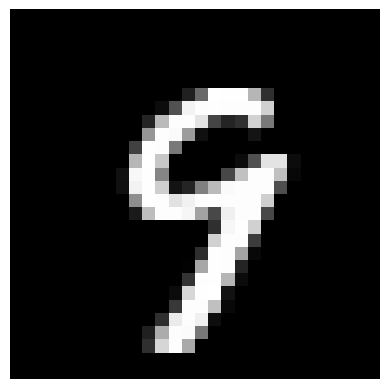

In [93]:
index = np.random.choice(len(x_test), 1, replace=False)[0]
image = x_test[index].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()